# **Thyroid Cancer Risk Prediction**

In [45]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [46]:
df = pd.read_csv('/content/thyroid_cancer_risk_data.csv')

In [48]:
df

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [49]:
df.shape

(212691, 17)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [51]:
## checking for missing values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [52]:
# No missing values present

In [53]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [54]:
df['TSH_Level'].min()

0.1

In [55]:
df['TSH_Level'].max()

10.0

In [56]:
# Droping irrelevant column
df.drop(columns=['Patient_ID'], inplace=True)

In [57]:
# Droping other not useful columns
df.drop(columns=['T3_Level', 'T4_Level', 'Nodule_Size'], inplace=True)

In [58]:
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,High,Benign


In [59]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [15]:
numerical_cols

Index(['Age', 'TSH_Level'], dtype='object')

In [60]:
categorical_cols

Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

## Uivariate Analysis

In [61]:
numerical_summary = df[numerical_cols].describe()

In [62]:
numerical_summary

,Age,TSH_Level
count,212691.000000,212691.000000
mean,51.918497,5.045102
std,21.632815,2.860264
min,15.000000,0.100000
25%,33.000000,2.570000
50%,52.000000,5.040000
75%,71.000000,7.520000
max,89.000000,10.000000


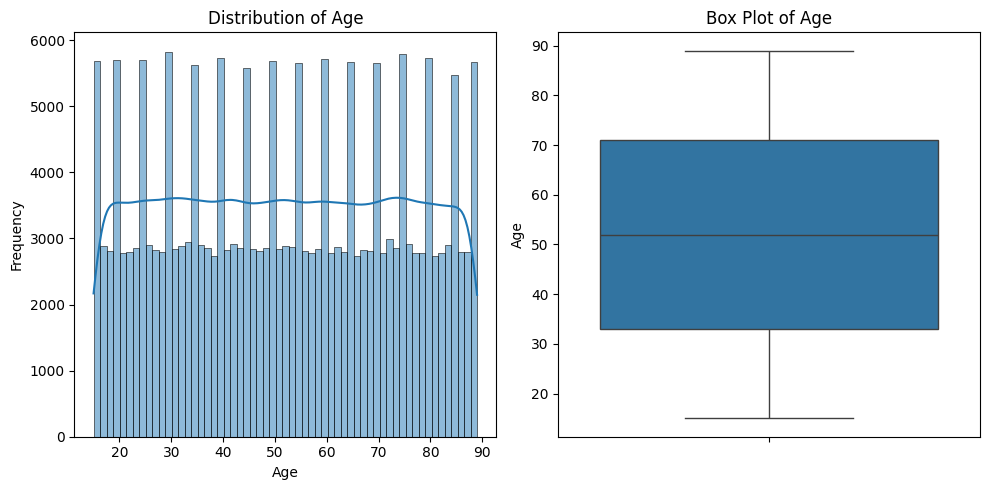

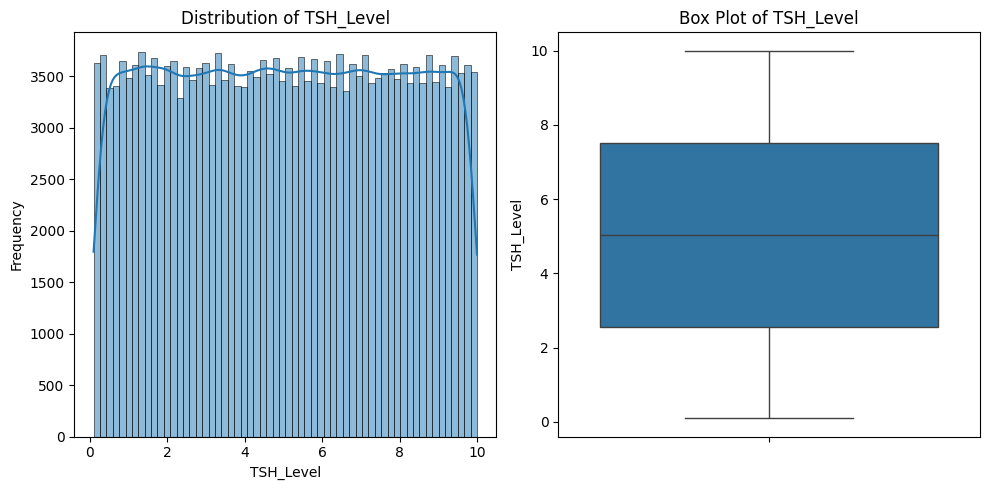

In [63]:
# Plot for numerical distributions and outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [64]:
for col in categorical_cols:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    print(summary_df)


         Count  Percentage
Gender                    
Female  127527   59.958813
Male     85164   40.041187
             Count  Percentage
Country                       
India        42496   19.980159
China        31978   15.034957
Nigeria      31918   15.006747
Brazil       21413   10.067657
Russia       21297   10.013118
Japan        16867    7.930284
South Korea  14965    7.036029
UK           10642    5.003503
USA          10558    4.964009
Germany      10557    4.963539
                Count  Percentage
Ethnicity                        
Caucasian       63669   29.934976
Asian           53261   25.041492
African         42414   19.941605
Hispanic        32012   15.050942
Middle Eastern  21335   10.030984
                 Count  Percentage
Family_History                    
No              148866   69.991678
Yes              63825   30.008322
                     Count  Percentage
Radiation_Exposure                    
No                  180831   85.020523
Yes                  3186

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


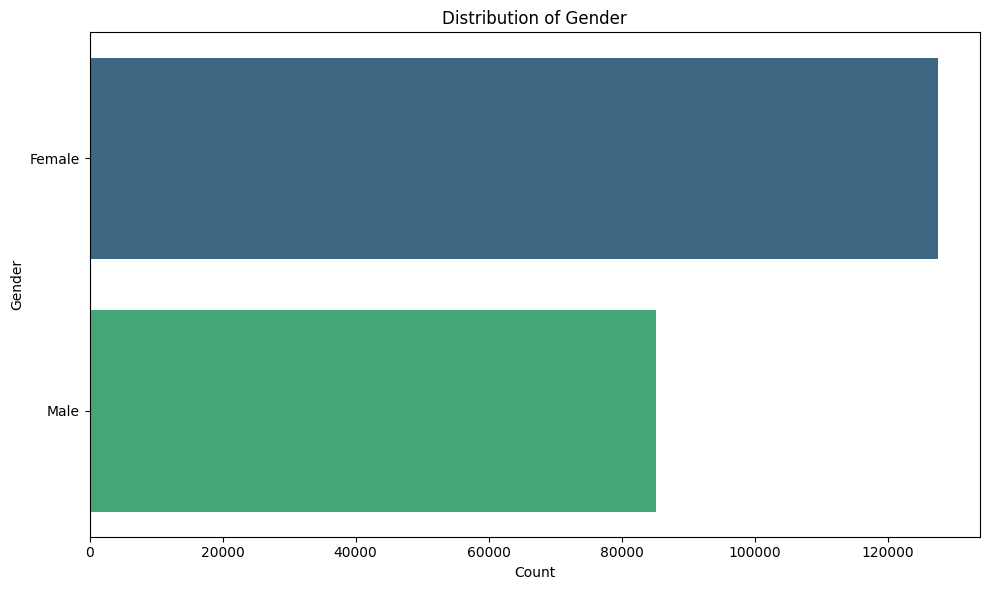

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


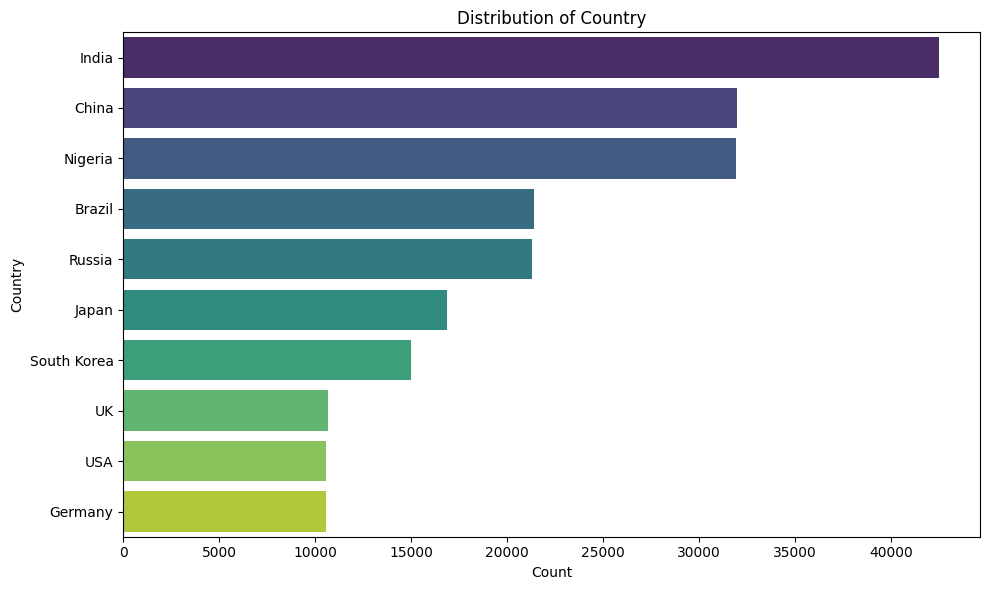

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


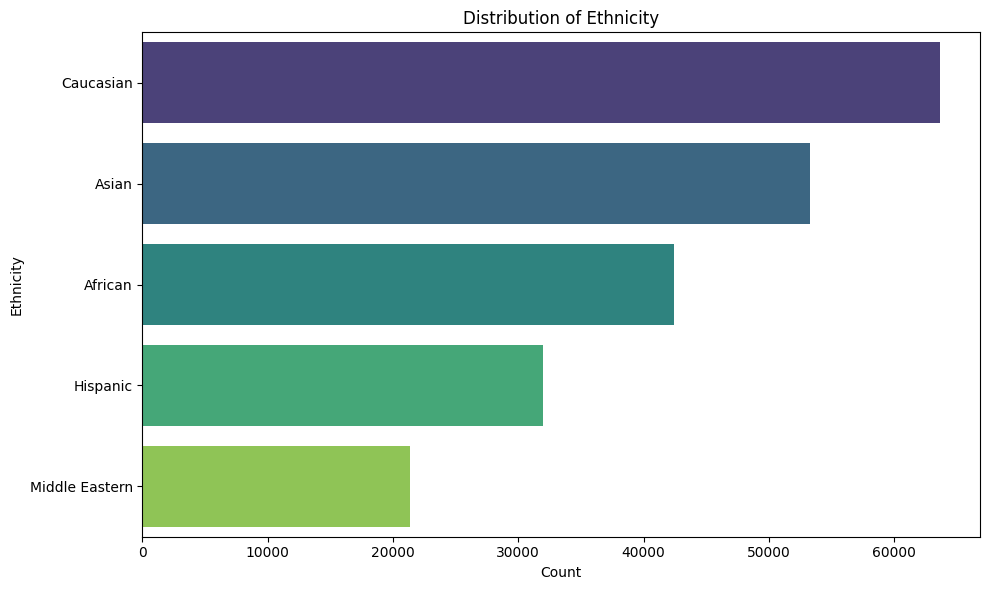

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


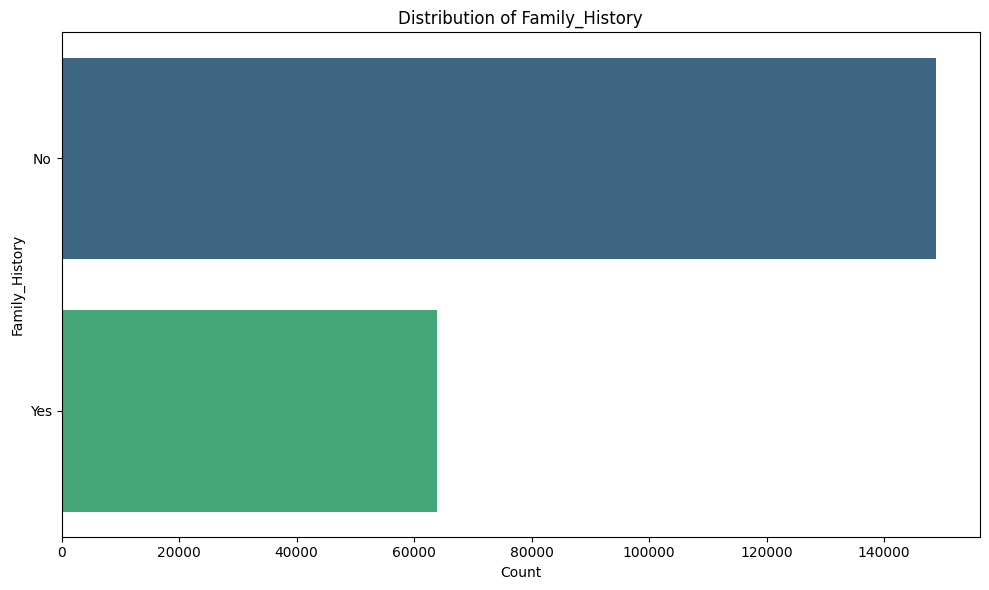

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


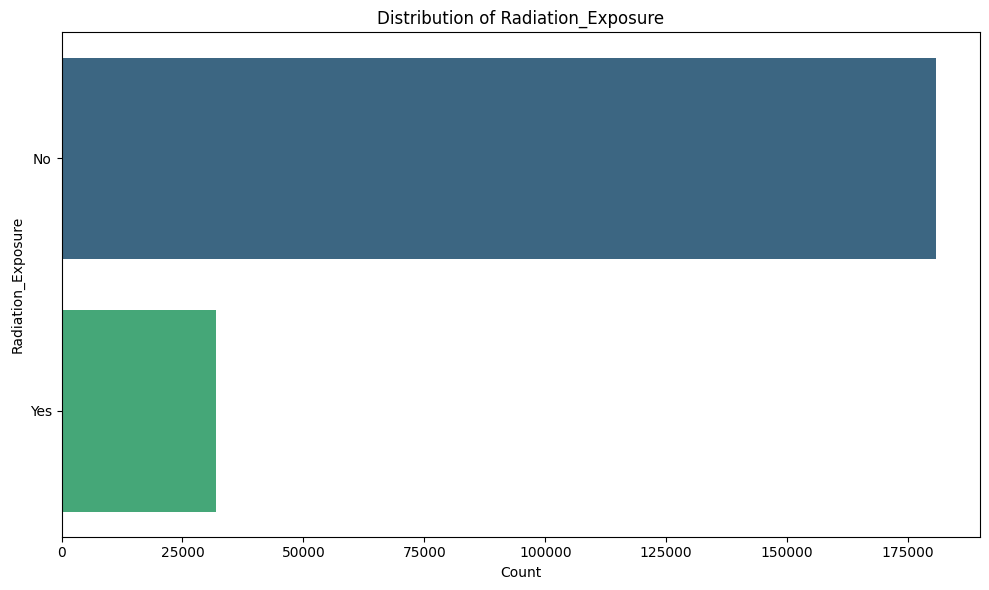

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


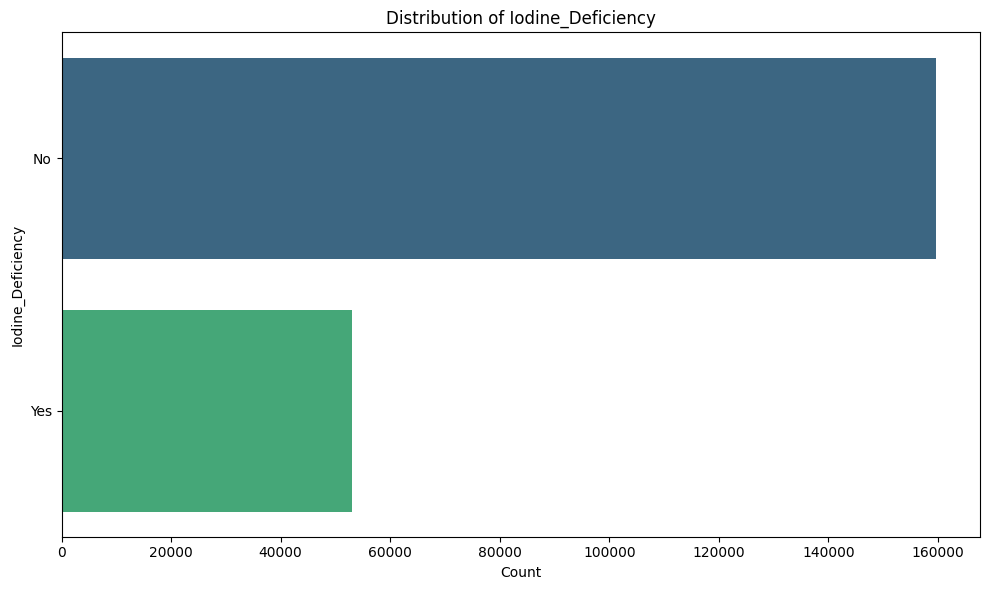

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


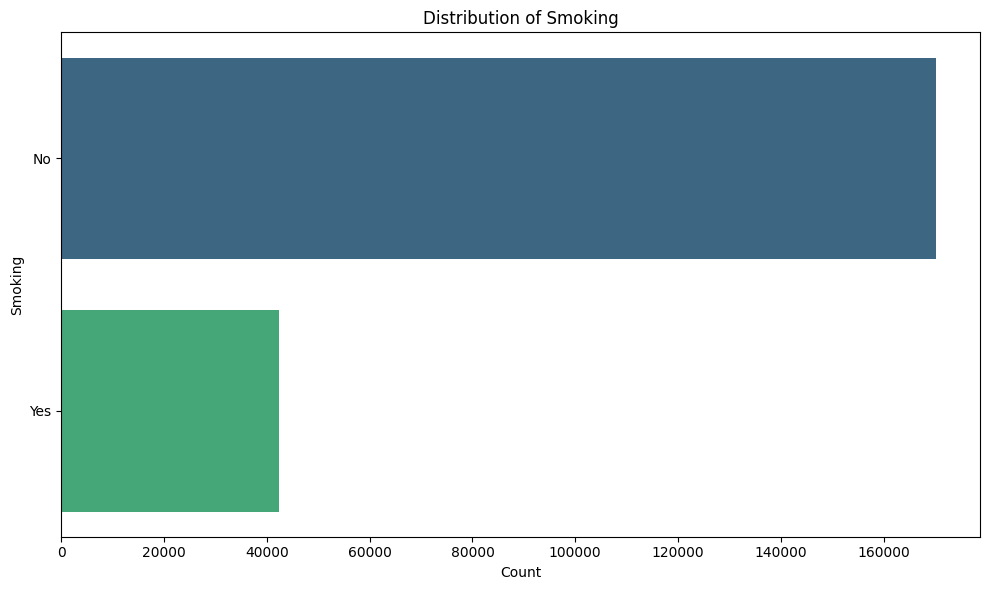

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


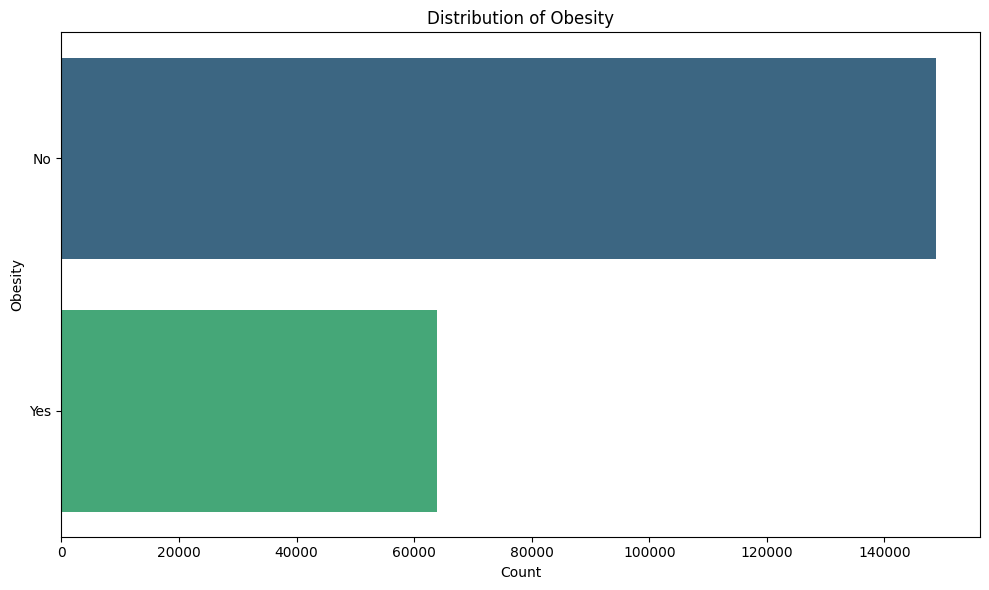

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


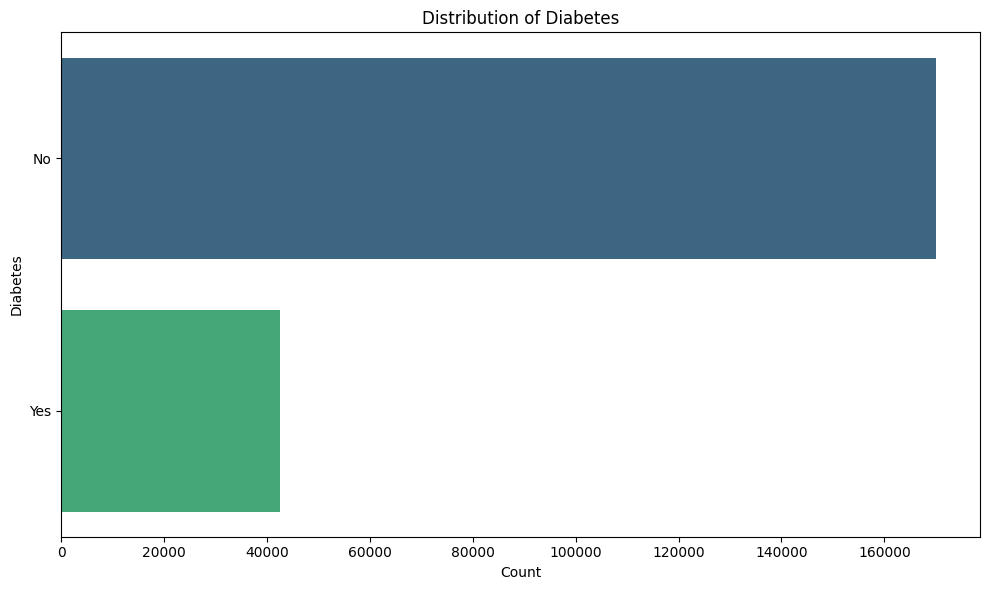

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


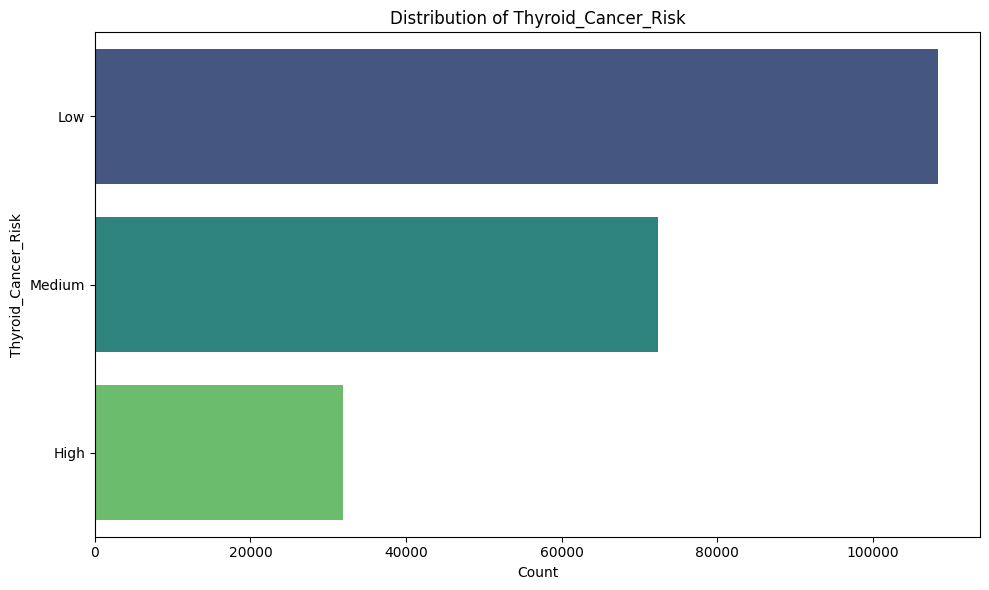

/tmp/ipython-input-65-1176068148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


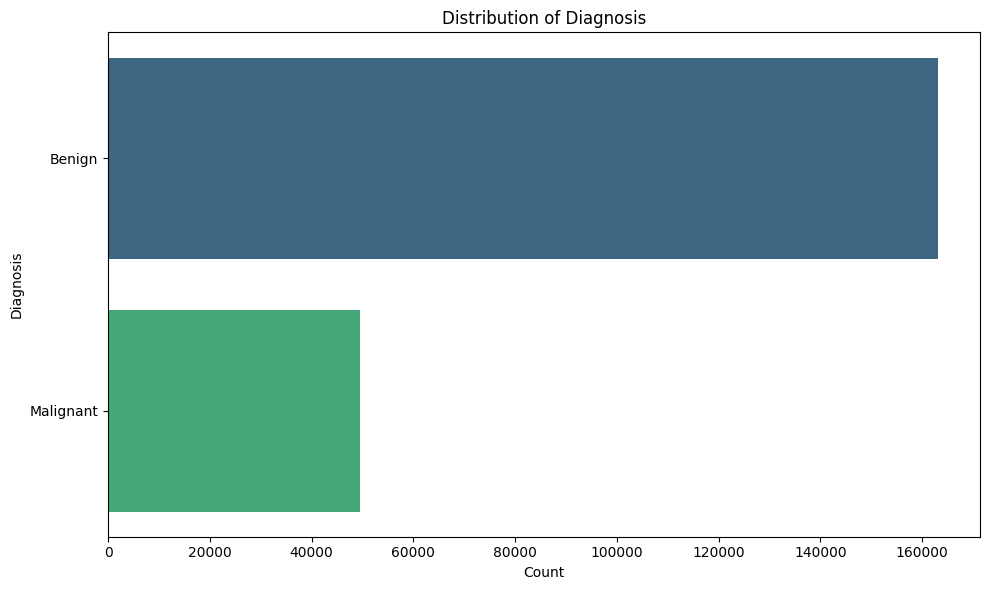

In [65]:
# Plot for categorical distribution
for col in categorical_cols:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [66]:
df.head(2)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,Low,Benign


## Bivariate Analysis

In [67]:
df.columns

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


Analyzing Gender vs. Thyroid_Cancer_Risk


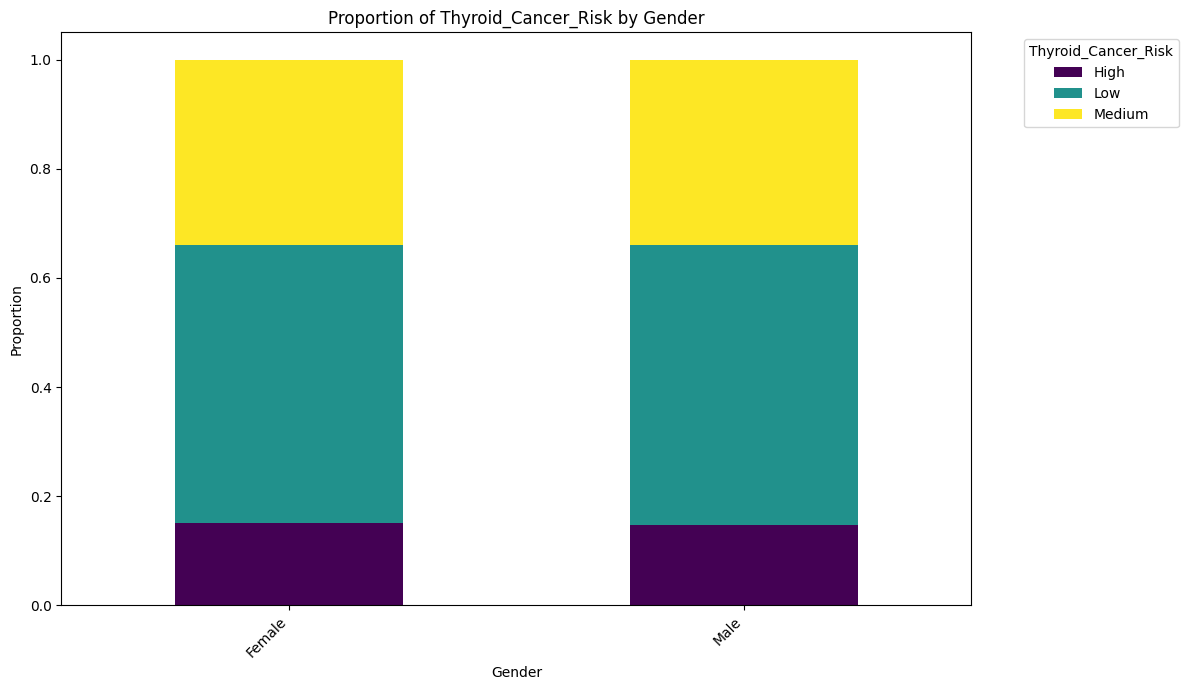

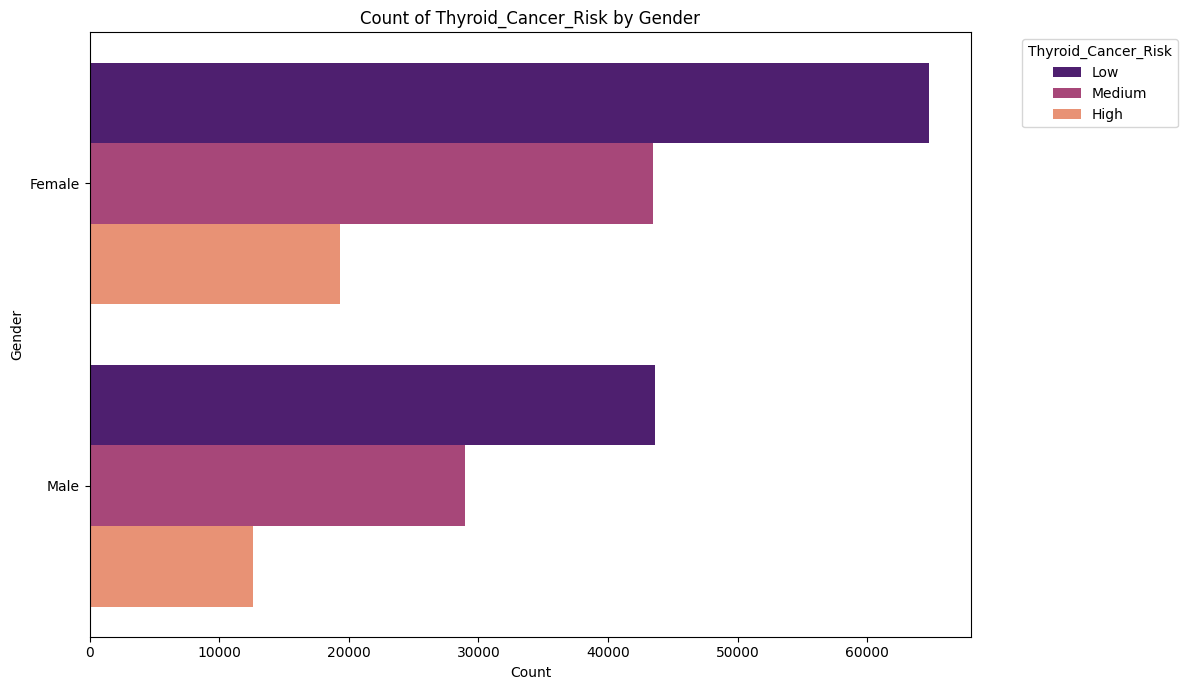


Analyzing Country vs. Thyroid_Cancer_Risk


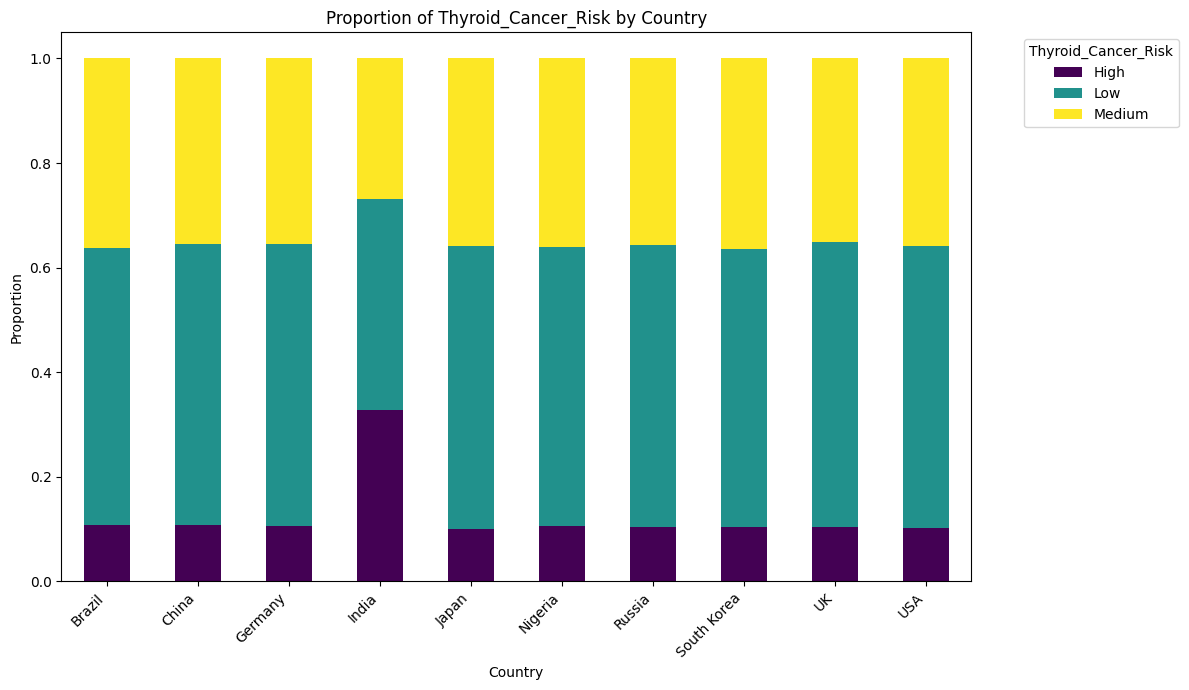

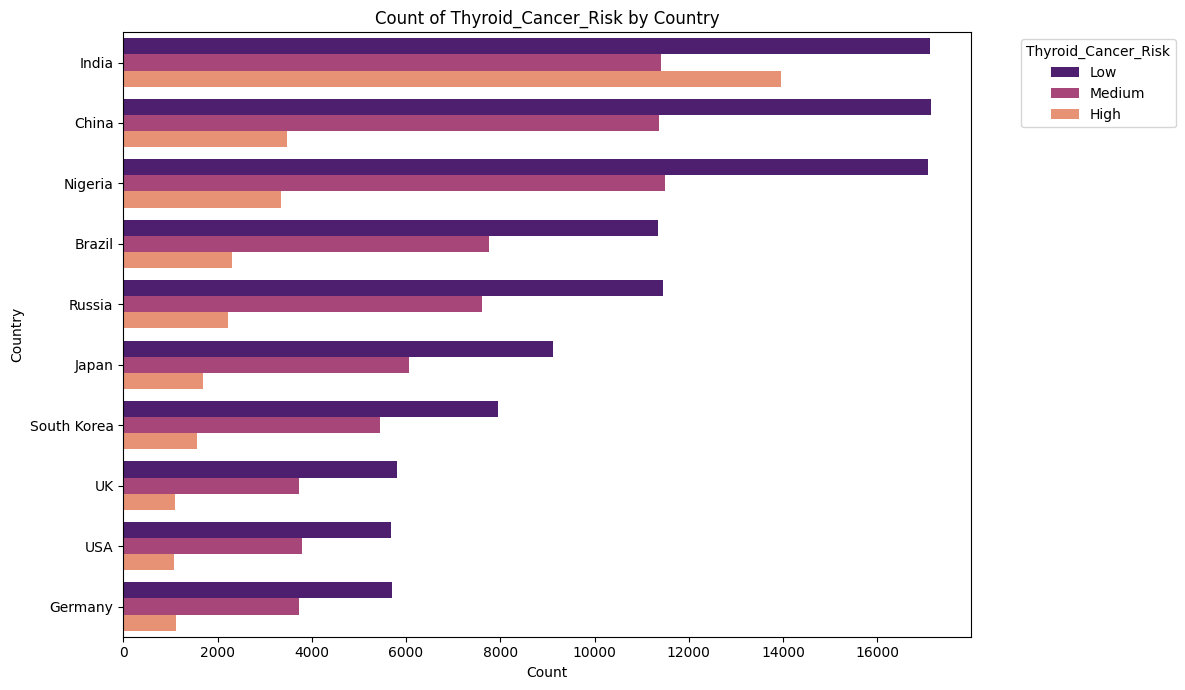


Analyzing Ethnicity vs. Thyroid_Cancer_Risk


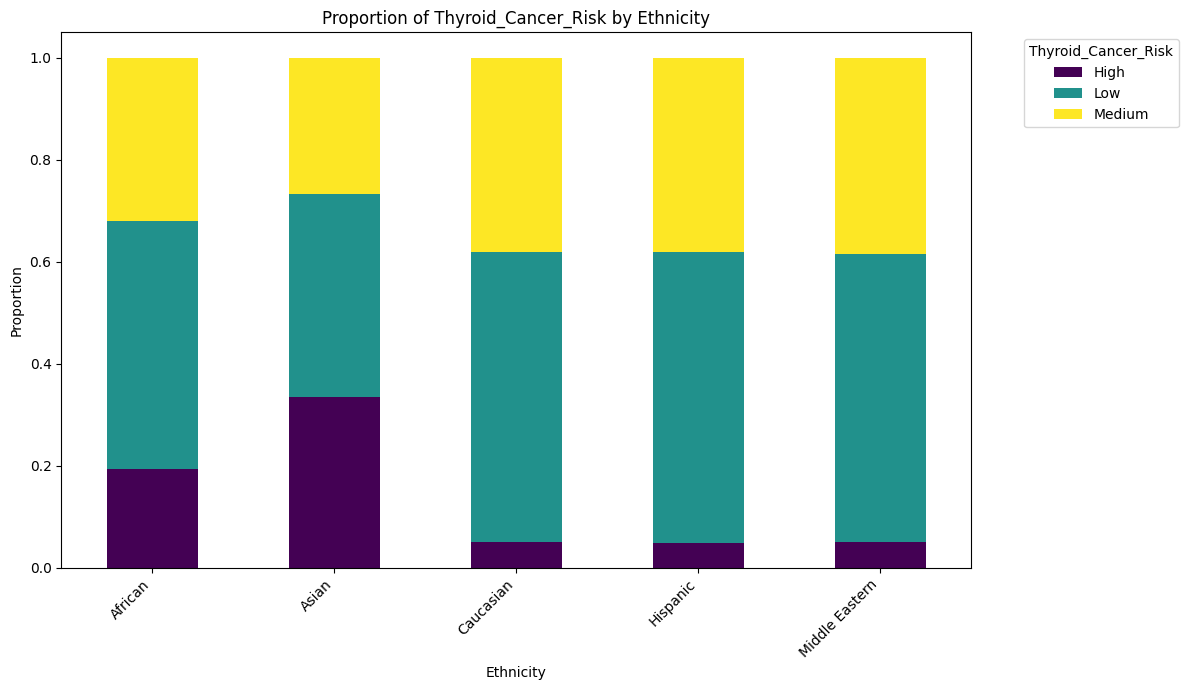

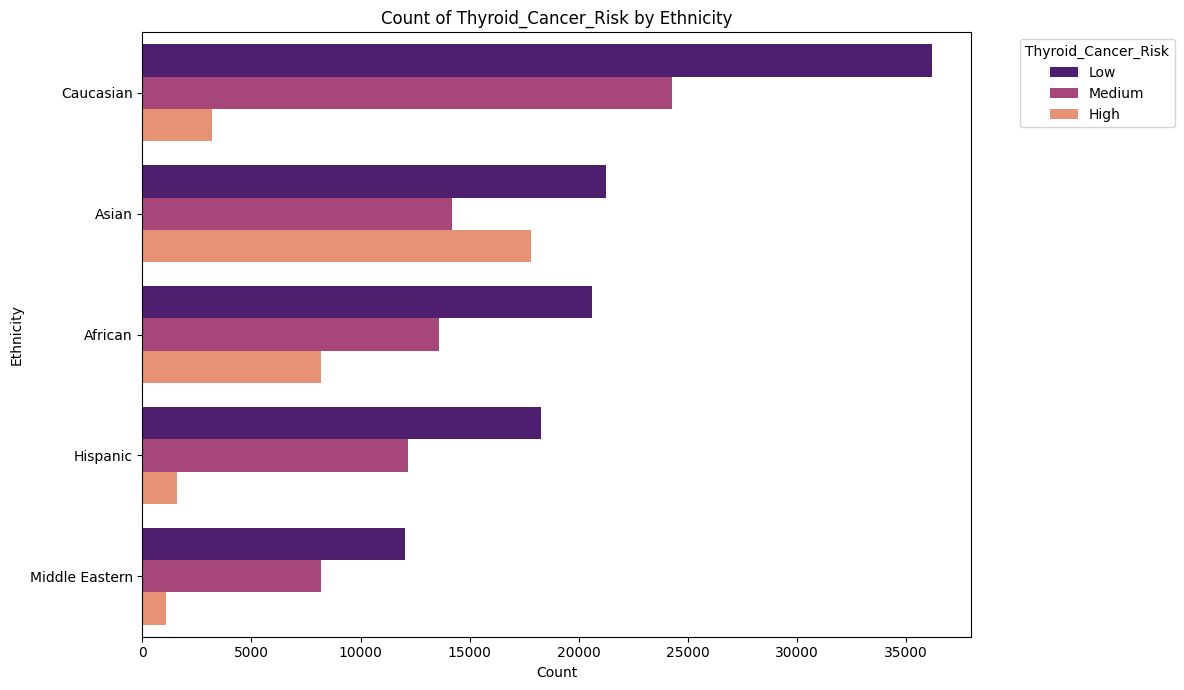


Analyzing Family_History vs. Thyroid_Cancer_Risk


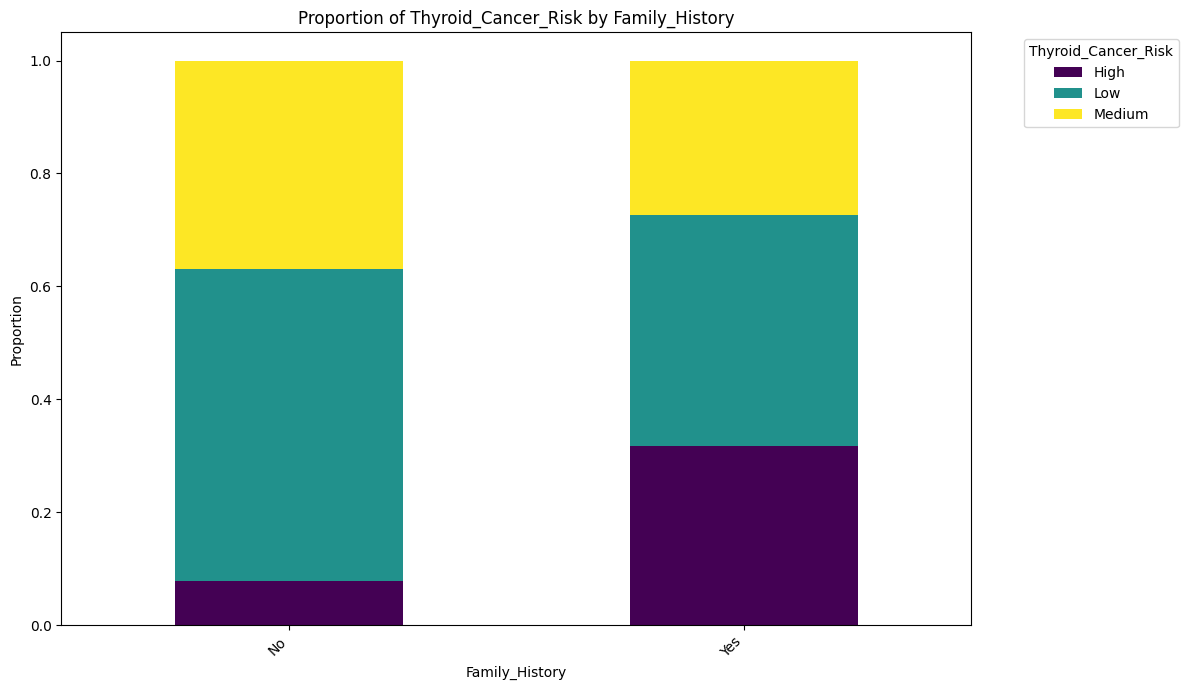

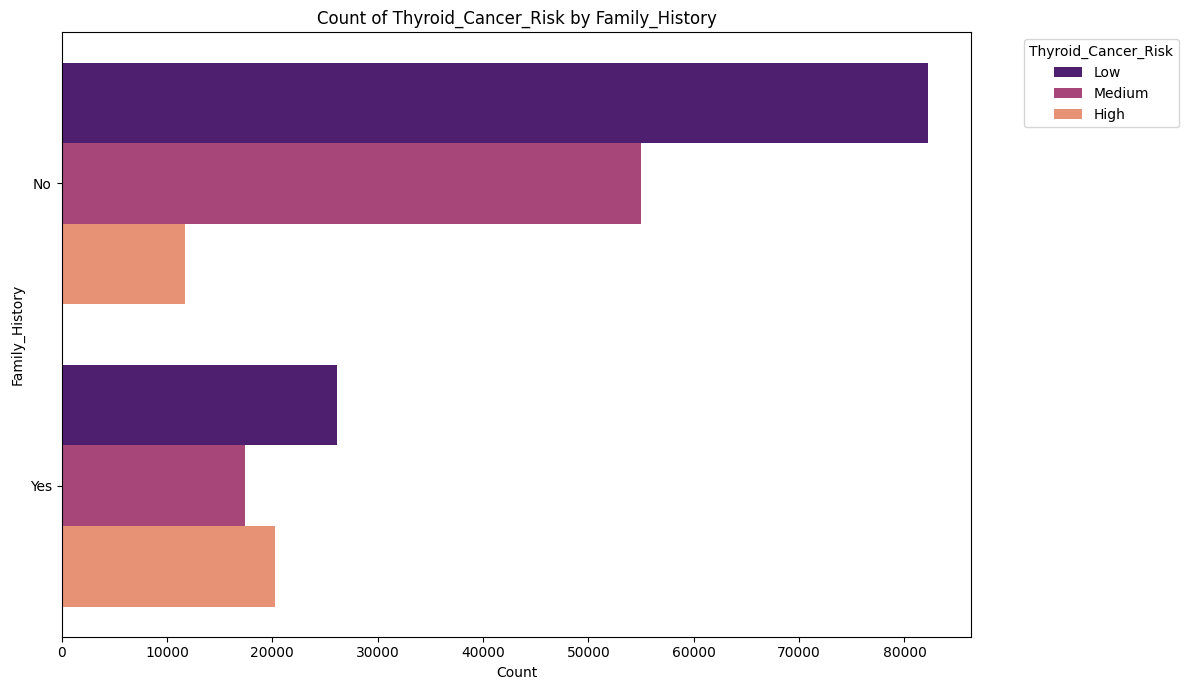


Analyzing Radiation_Exposure vs. Thyroid_Cancer_Risk


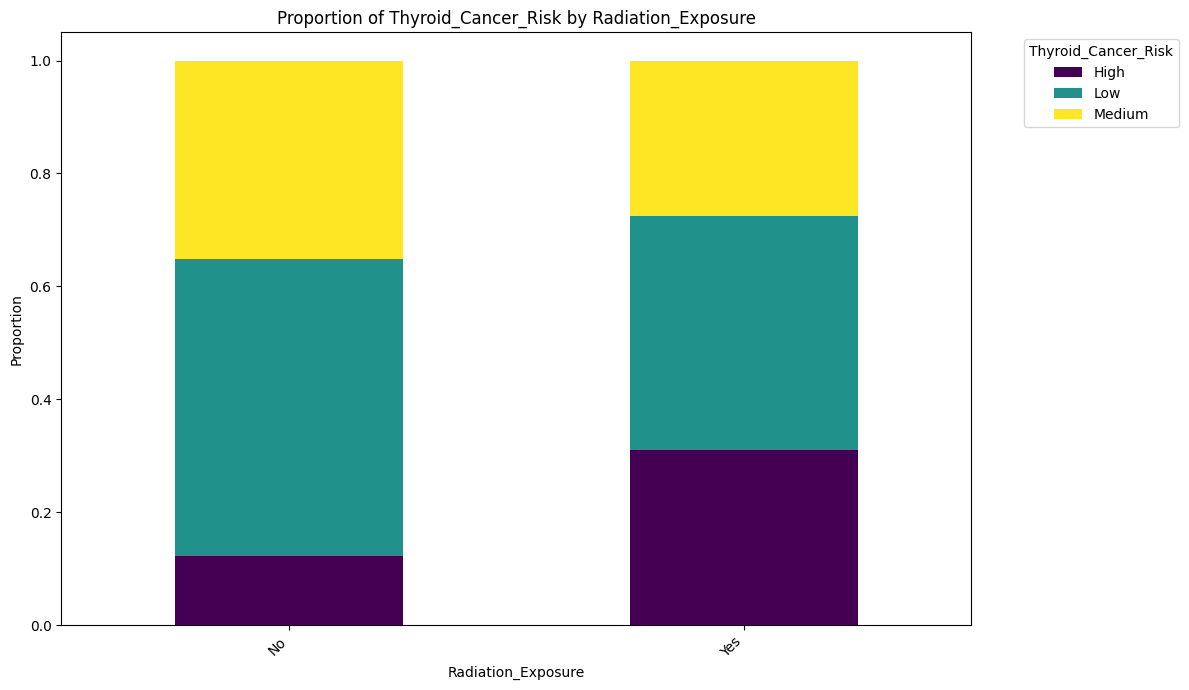

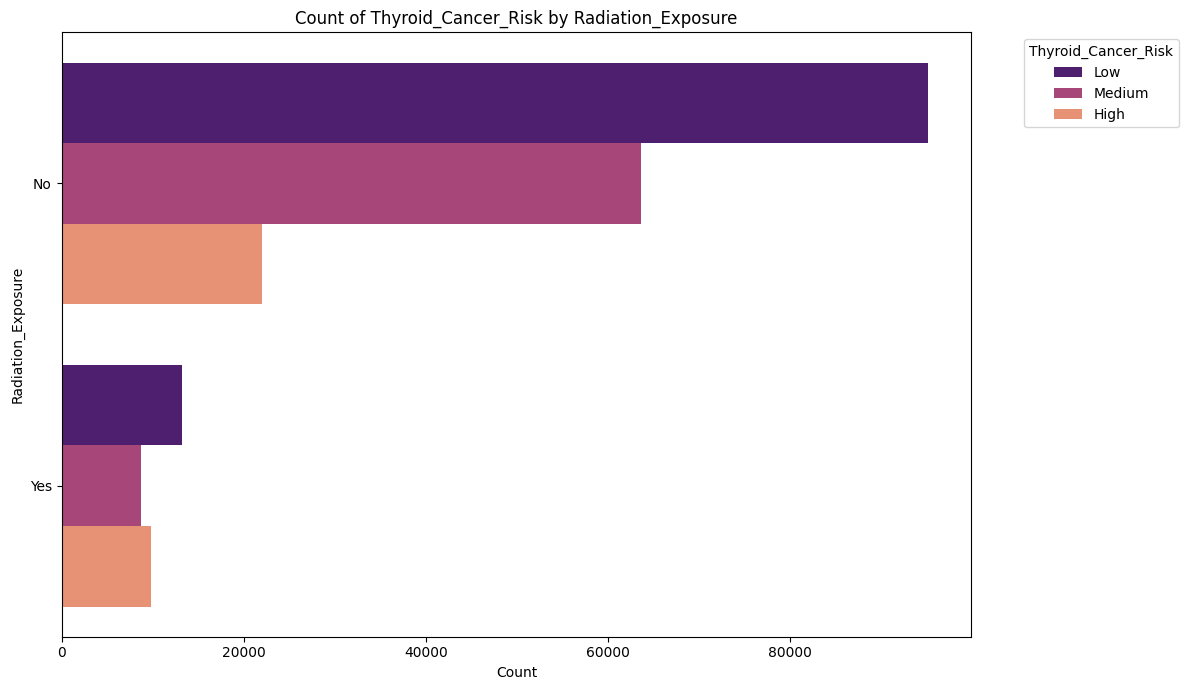


Analyzing Iodine_Deficiency vs. Thyroid_Cancer_Risk


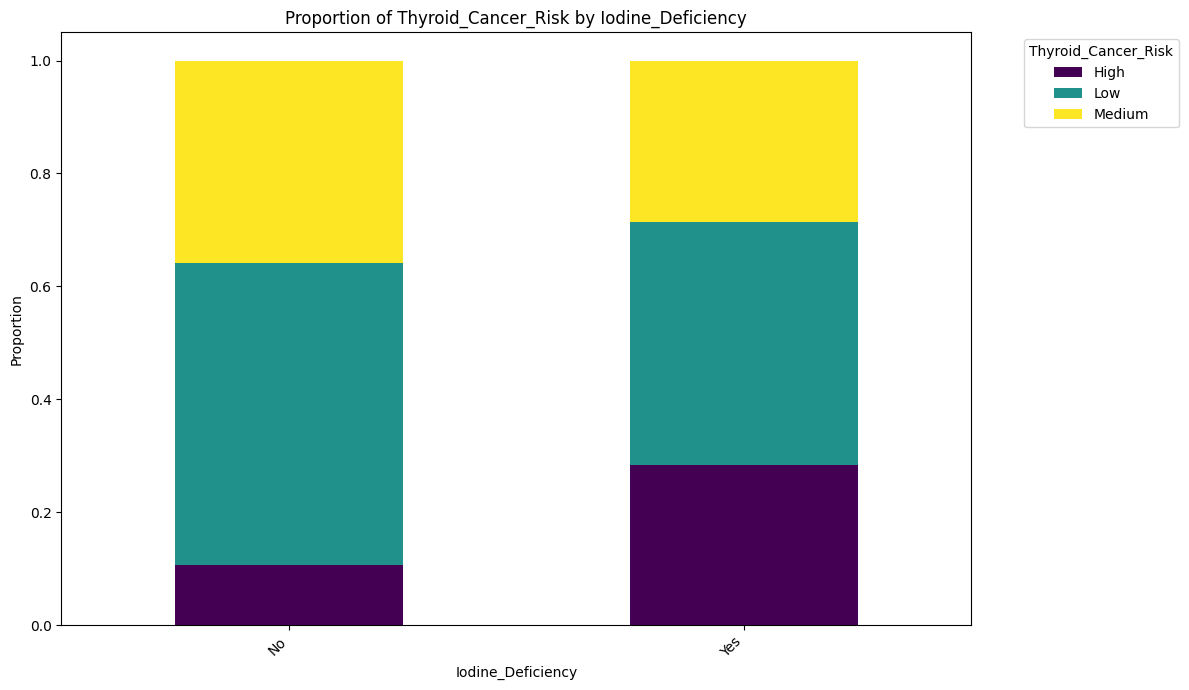

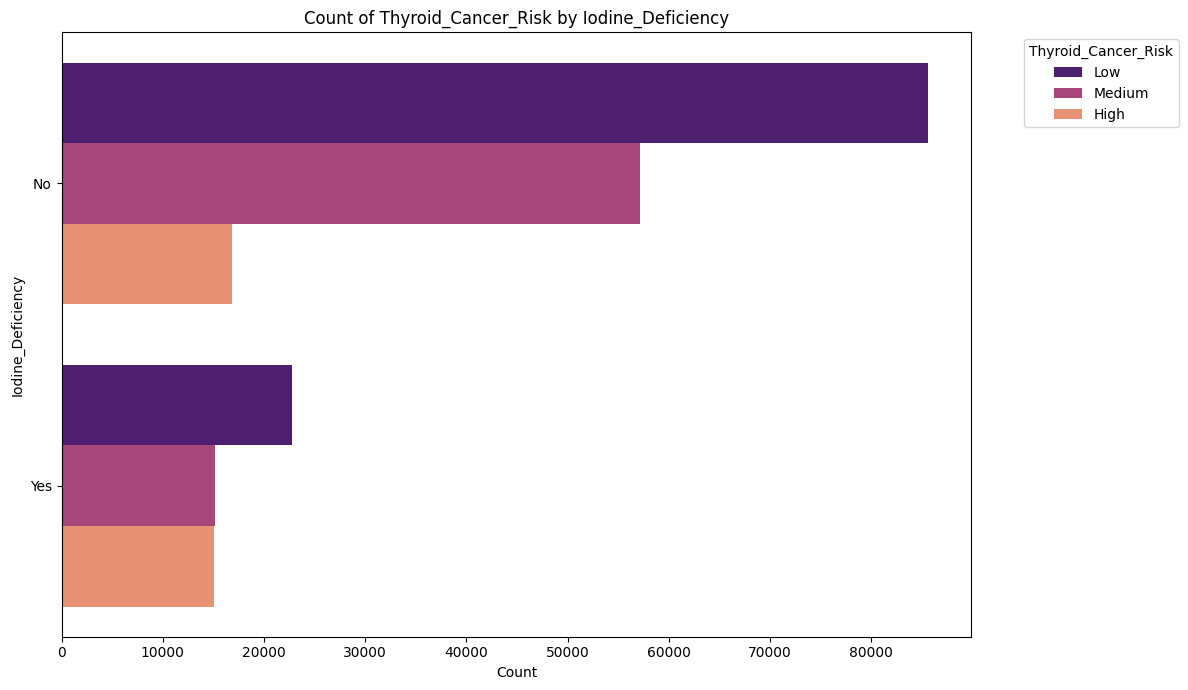


Analyzing Smoking vs. Thyroid_Cancer_Risk


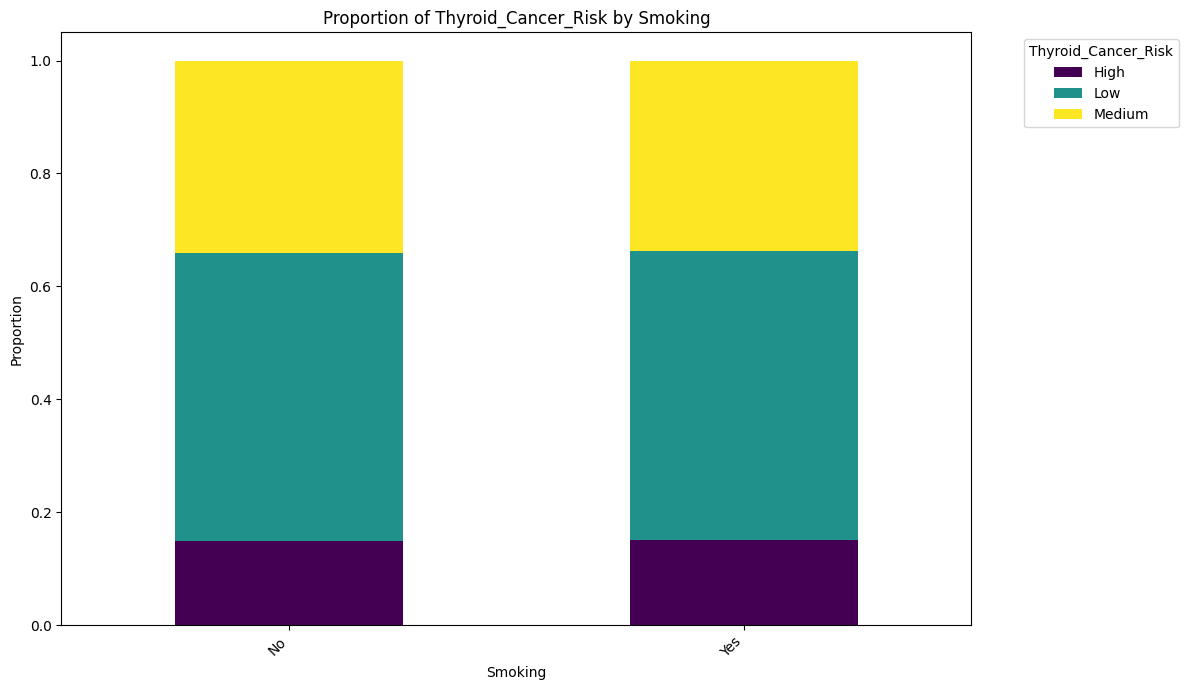

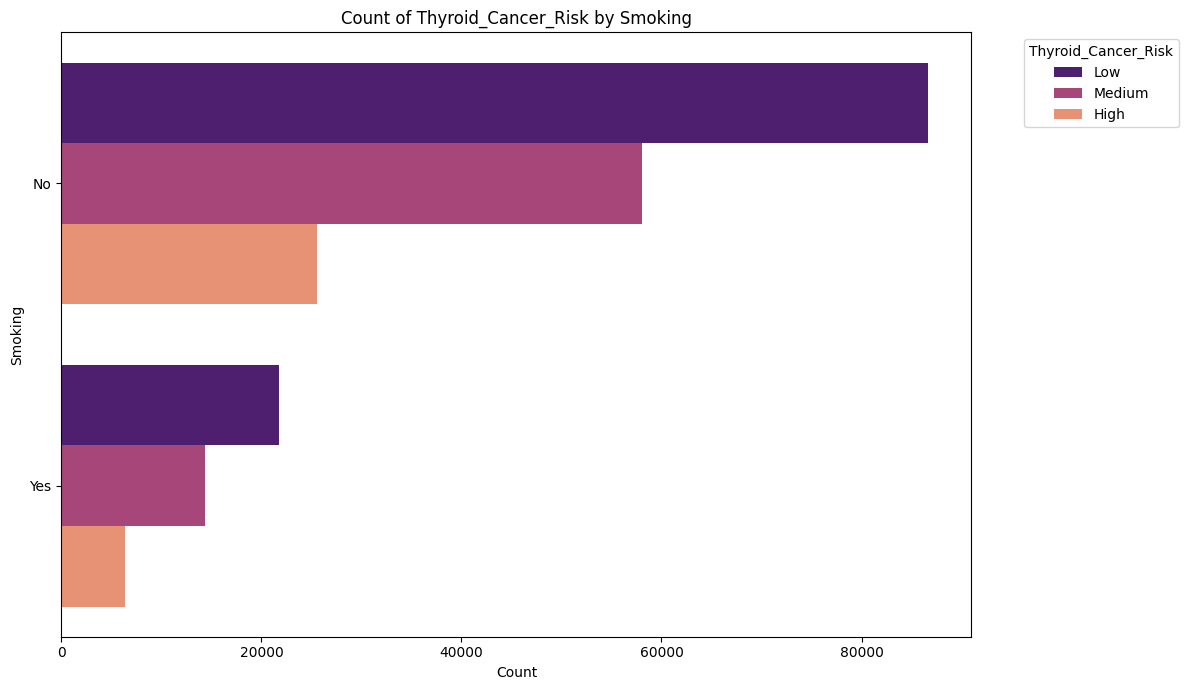


Analyzing Obesity vs. Thyroid_Cancer_Risk


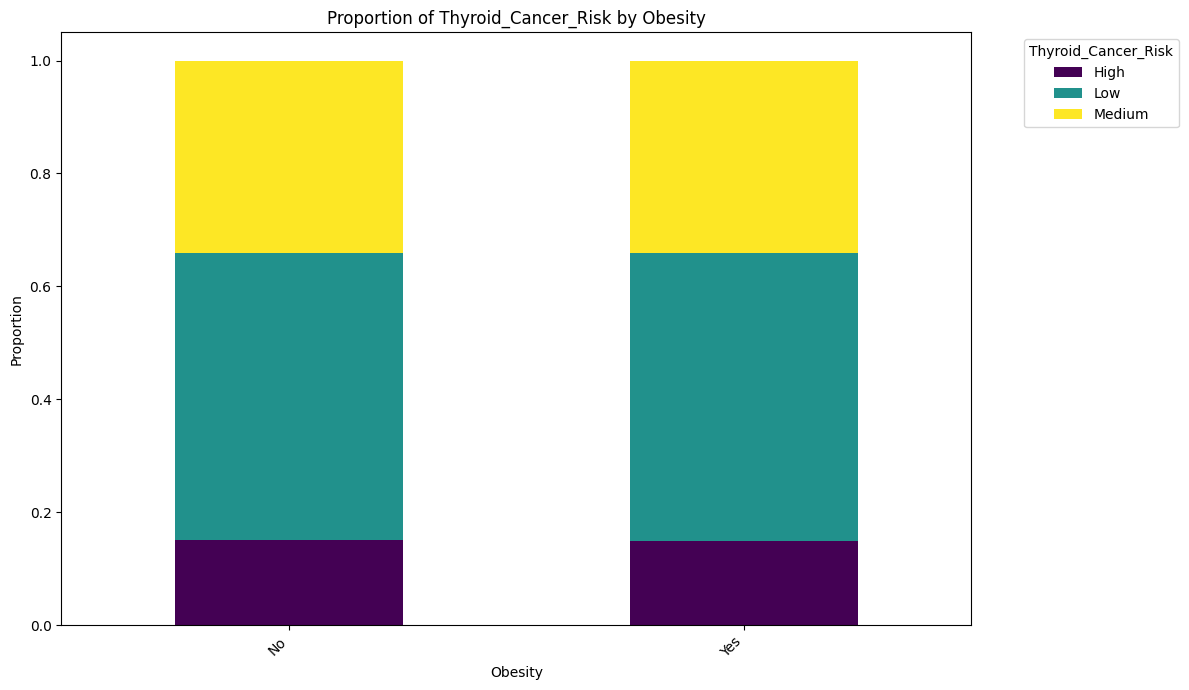

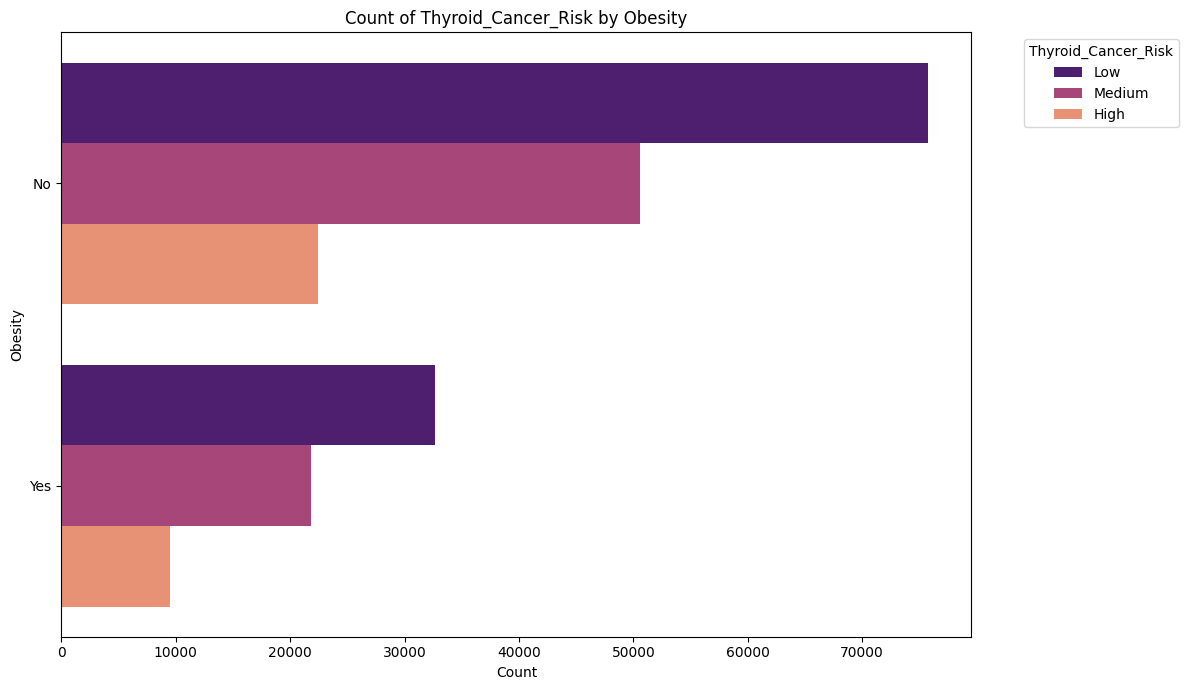


Analyzing Diabetes vs. Thyroid_Cancer_Risk


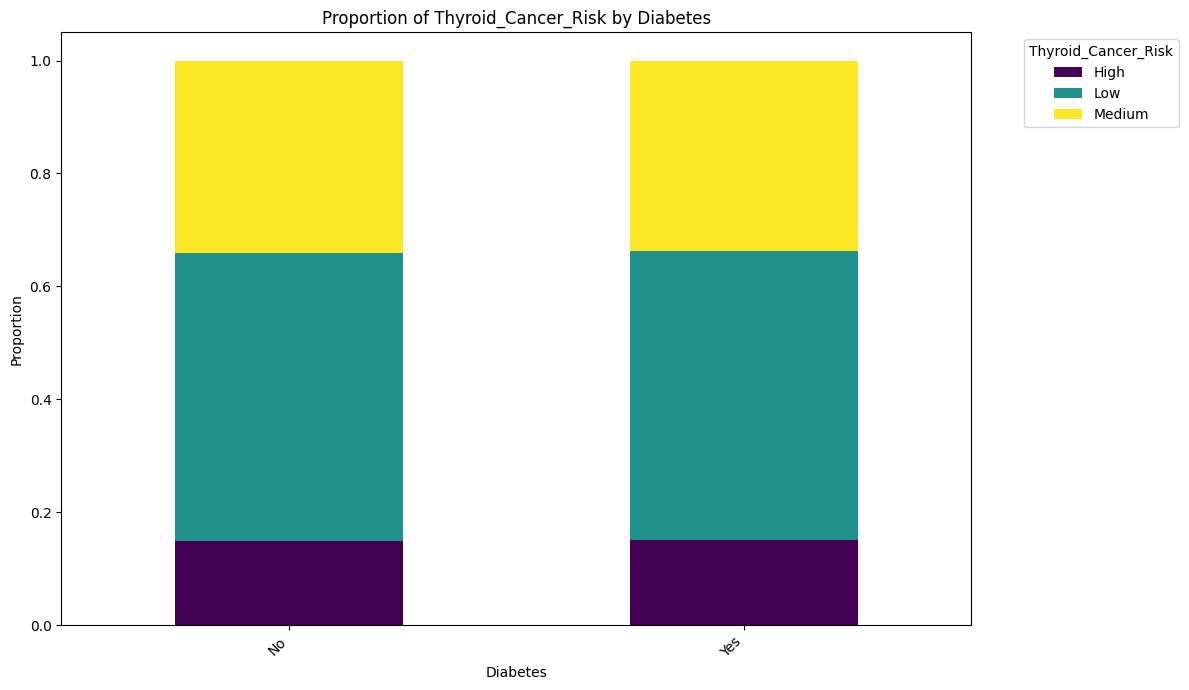

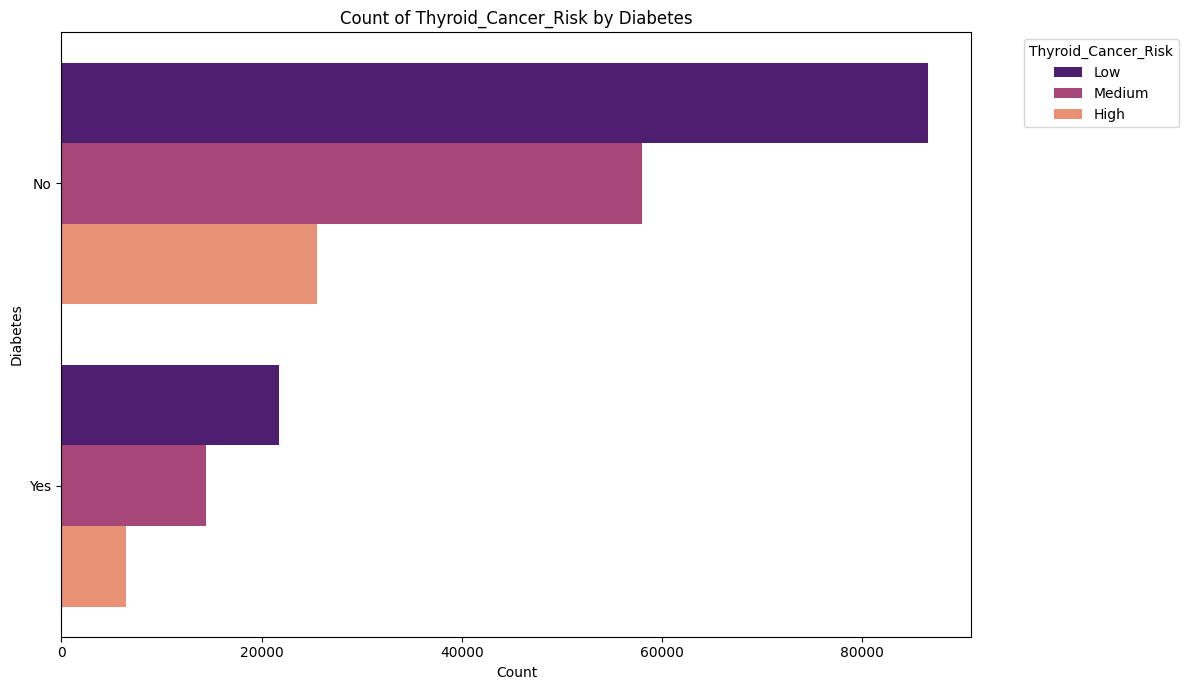

In [68]:
# Columns for bivariate analysis against 'Diagnosis'
analysis_cols = [
    'Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
    'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes'
]
target_col = 'Thyroid_Cancer_Risk'

for col in analysis_cols:
    print(f"\nAnalyzing {col} vs. {target_col}")

    # 1. Stacked Bar Chart (Proportions)

    cross_tab = pd.crosstab(df[col], df[target_col])
    cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)

    plt.figure(figsize=(12, 7))
    cross_tab_norm.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Proportion of {target_col} by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 2. Count Plot (Absolute Counts)
    plt.figure(figsize=(12, 7))
    sns.countplot(y=col, hue=target_col, data=df, order=df[col].value_counts().index, palette='magma')
    plt.title(f'Count of {target_col} by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



In [69]:
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,High,Benign


In [70]:
df.drop(columns=['Diagnosis', 'Ethnicity'], inplace=True)

In [71]:
df.head(2)

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,Thyroid_Cancer_Risk
0,66,Male,Russia,No,Yes,No,No,No,No,9.37,Low
1,29,Male,Germany,No,Yes,No,No,No,No,1.83,Low


In [72]:
df2 = df.sample(n=30000, random_state=42)

print(df2.shape)

(30000, 11)


In [77]:
# Label Encoding for categorical variables
label_encoders = {}
for col in df2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

In [78]:
df2.head()

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,Thyroid_Cancer_Risk
82562,81,1,6,0,0,1,0,1,0,0.81,1
101549,19,0,3,1,0,0,1,0,0,9.90,0
97401,44,1,0,1,0,0,1,0,0,0.96,2
105415,56,0,5,0,0,0,0,0,0,5.49,1
152387,86,1,5,1,0,0,0,0,0,7.28,2


In [79]:
# Features & Target
X = df2.drop('Thyroid_Cancer_Risk', axis=1)
y = df2['Thyroid_Cancer_Risk']

In [80]:
X

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level
82562,81,1,6,0,0,1,0,1,0,0.81
101549,19,0,3,1,0,0,1,0,0,9.90
97401,44,1,0,1,0,0,1,0,0,0.96
105415,56,0,5,0,0,0,0,0,0,5.49
152387,86,1,5,1,0,0,0,0,0,7.28
...,...,...,...,...,...,...,...,...,...,...
134780,52,1,3,0,0,0,1,1,0,3.41
118867,83,0,6,0,1,0,1,0,0,9.49
191736,51,1,5,0,0,0,0,1,0,6.20
76575,71,0,7,0,0,0,0,0,1,7.64


In [81]:
y

,Thyroid_Cancer_Risk
82562,1
101549,0
97401,2
105415,1
152387,2
...,...
134780,2
118867,1
191736,1
76575,2


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# For counts
df2['Thyroid_Cancer_Risk'].value_counts()

,count
Thyroid_Cancer_Risk,
1,15259
2,10194
0,4547


In [85]:
# For percentage
df2['Thyroid_Cancer_Risk'].value_counts(normalize=True)


,proportion
Thyroid_Cancer_Risk,
1,0.508633
2,0.339800
0,0.151567


In [86]:
# Applying SMOTE on Training Data

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Thyroid_Cancer_Risk
1    12168
2     8201
0     3631
Name: count, dtype: int64
After SMOTE: Thyroid_Cancer_Risk
2    12168
1    12168
0    12168
Name: count, dtype: int64


In [87]:
# Scale the data

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [88]:
# Training Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}")

Logistic Regression: Mean CV Accuracy = 0.5335
Random Forest: Mean CV Accuracy = 0.6205


In [89]:
# Hyperparameter tuning for Random Forest

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

best_model = grid_search.best_estimator_


In [90]:
best_model

RandomForestClassifier()

In [92]:
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.4653333333333333
              precision    recall  f1-score   support

           0       0.42      0.64      0.51       916
           1       0.55      0.49      0.52      3091
           2       0.37      0.35      0.36      1993

    accuracy                           0.47      6000
   macro avg       0.45      0.49      0.46      6000
weighted avg       0.47      0.47      0.46      6000

[[ 585  234   97]
 [ 477 1507 1107]
 [ 318  975  700]]


In [93]:
# Save the model
import pickle

with open('thyroid_risk_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Pipeline with SMOTE completed and model saved!")

Pipeline with SMOTE completed and model saved!


In [95]:
import joblib

joblib.dump(label_encoders['Gender'], 'Gender_encoder.pkl')
joblib.dump(label_encoders['Country'], 'Country_encoder.pkl')

['Country_encoder.pkl']

In [96]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)